In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [19]:
def flip_image(img, opt):
    r,c = img.shape
    out = np.zeros_like(img, dtype='uint8') 
    for i in range(r):
        for j in range(c):
            if opt == 0:
                out[i,c-j-1] = img[i,j]
            elif opt == 1:
                out[r-i-1,j] = img[i,j]
            elif opt == 2:
                out[r-i-1,c-j-1] = img[i,j]
            else:
                out[i,j] = img[i,j]
    return out.astype(np.uint8)

In [25]:
def centroid_image(img):
    r,c = img.shape
    return (int(r/2),int(c/2))  

In [27]:
def init_Transformation():
    return np.identity(3, dtype = float)

def matrix_Rotatef(T, deg):
    R =  np.identity(3, dtype = float)
    theta = (deg*np.pi)/180
    R[0,0] = math.cos(theta)
    R[0,1] = math.sin(theta)
    R[1,0] = -math.sin(theta)
    R[1,1] = math.cos(theta)
    return np.matmul(R, T)

def matrix_Translate(T, tx, ty):
    Ts =  np.identity(3, dtype = float)
    Ts[2,0] = tx
    Ts[2,1] = ty
    return np.matmul(Ts, T)

def matrix_Scale(T, sx, sy):
    S =  np.identity(3, dtype = float)
    S[0,0] = sx
    S[1,1] = sy
    return  np.matmul(S, T)    

In [28]:
def img_transform(img, T):
    out = np.zeros_like(img, dtype='uint8')
    rows, cols = img.shape
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype = float)
            new_xy = np.matmul(xy, T)
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)

In [14]:
img = cv2.imread('cameraman.png', 0)

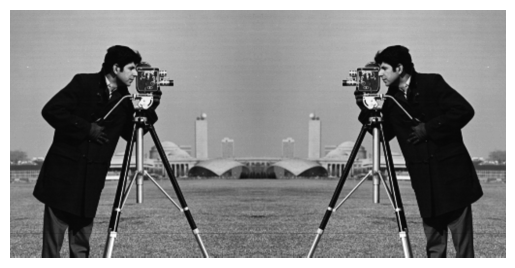

In [30]:
flip = flip_image(img, 0)
img_mults = cv2.hconcat([img, flip])
ShowImage(img_mults)

In [31]:
cen = centroid_image(flip)
print(cen)

(256, 256)


In [32]:
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])
T = matrix_Rotatef(T, -45)
T = matrix_Scale(T, 0.5, 0.5)
T  = matrix_Translate(T, -cen[1], -cen[0])
out = img_transform(flip, T)

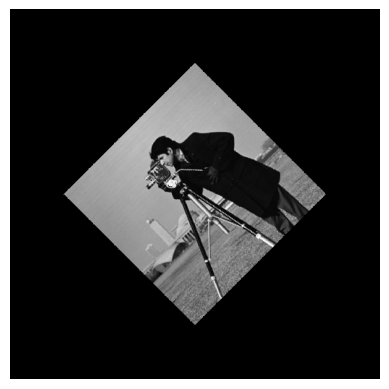

In [34]:
ShowImage(out)